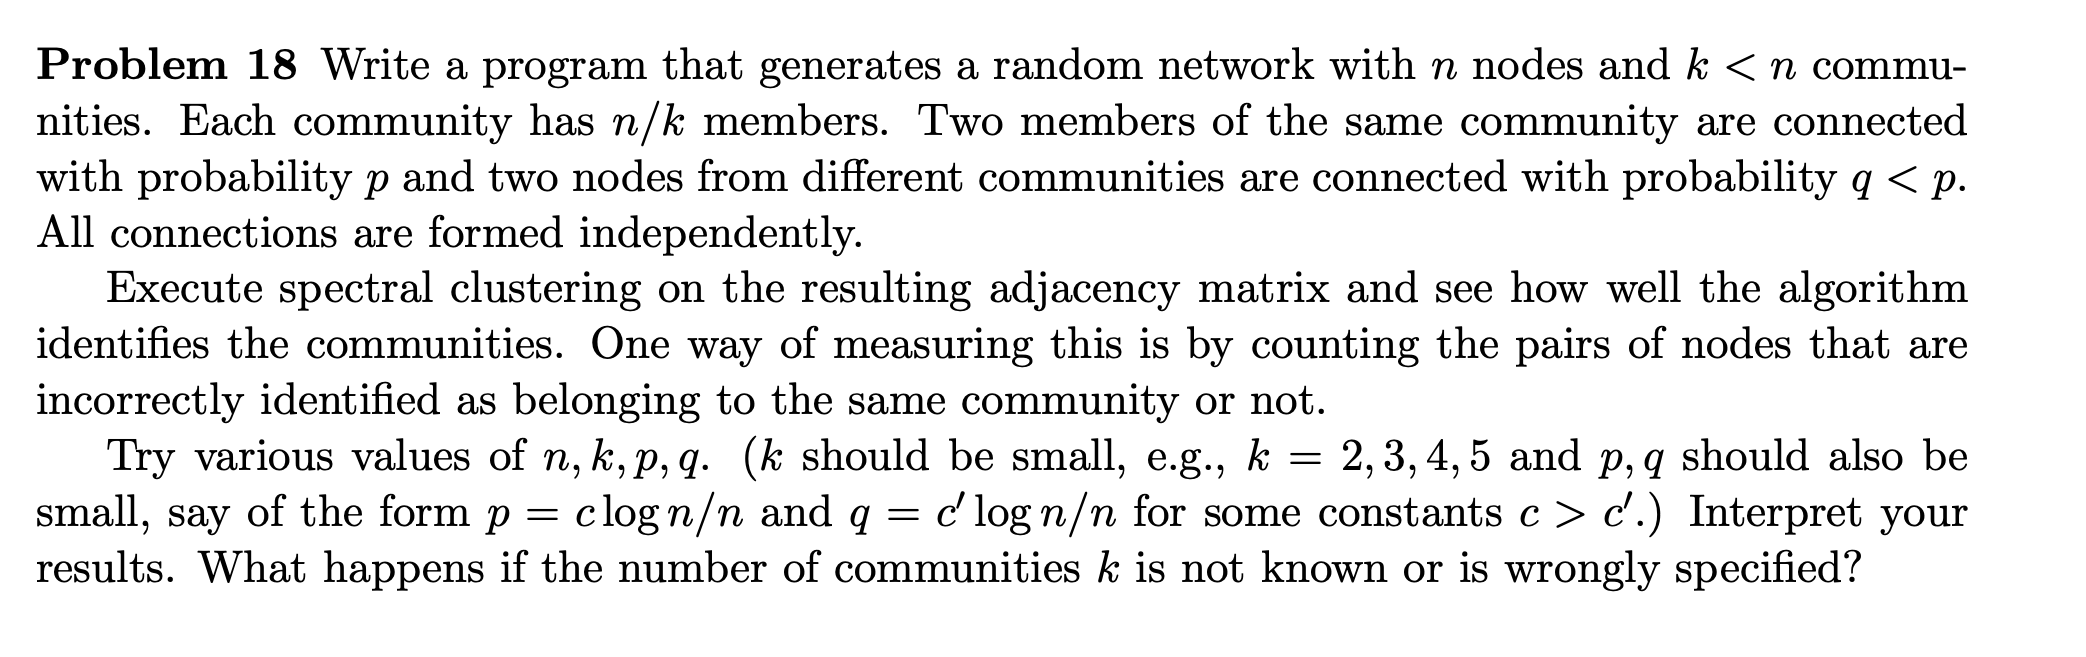

In [1]:
from IPython.display import Image
Image(filename='prob18.png')

# Change in correct classification rate over a range of ns, ps, qs and ks

- The bigger the differential between the values of p and q for nodes within communities and between communities, the higher the correct classification rate. 
    - The correct classification rate grows as n increases providing there is a big enough difference between p and q.
    - When values of p and q are too similar, it becomes more difficult to differentiate between clusters. 
    - In cases where the correct classification rate does not increase, we might expect that it would increase if n were allowed to grow large enough.
- Accuracy tends to be higher for lower numbers of clusters for the same values of n and p and q. It appears that we do not have large enough values of n here to observe an increase in correct classification rate for larger numbers of clusters.

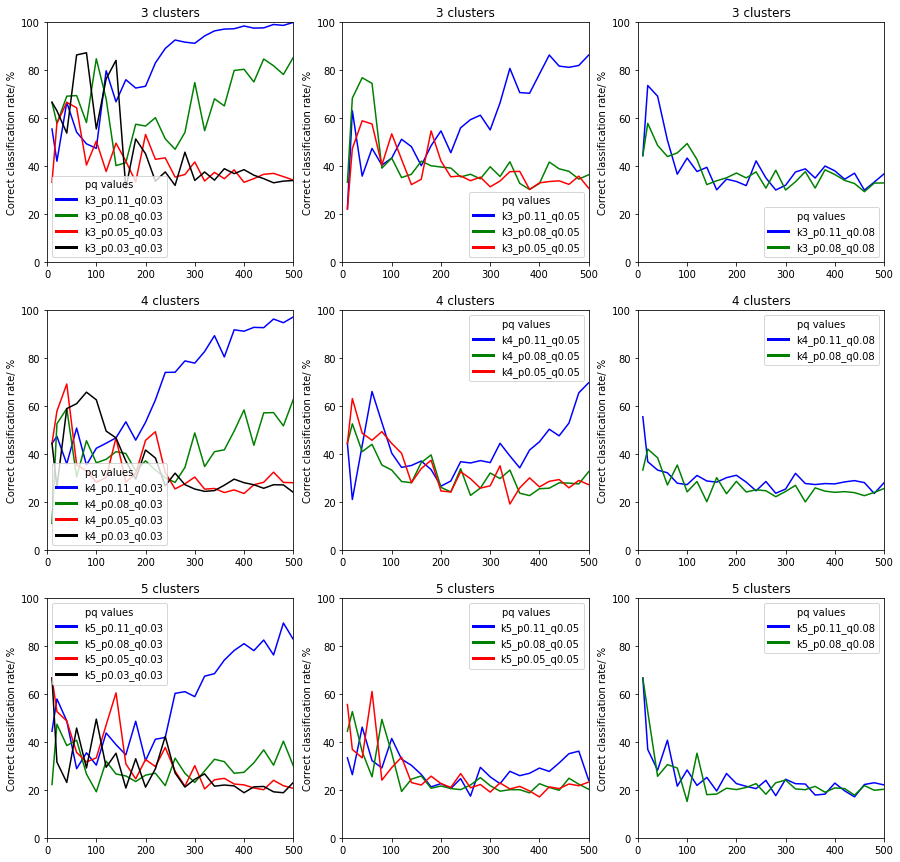

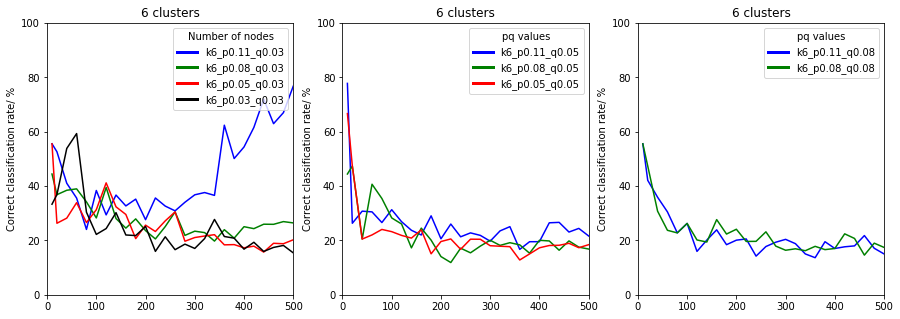

# Impact of specifying the incorrect number of clusters

- Over-specifying the number of clusters in general leads to higher accuracy than under-specifying the number of clusters.
- Beyond a certain n, there does not appear to be a value in increasing the sample size in order to increase the correct classification rate. This value of n is higher for higher numbers of clusters. 

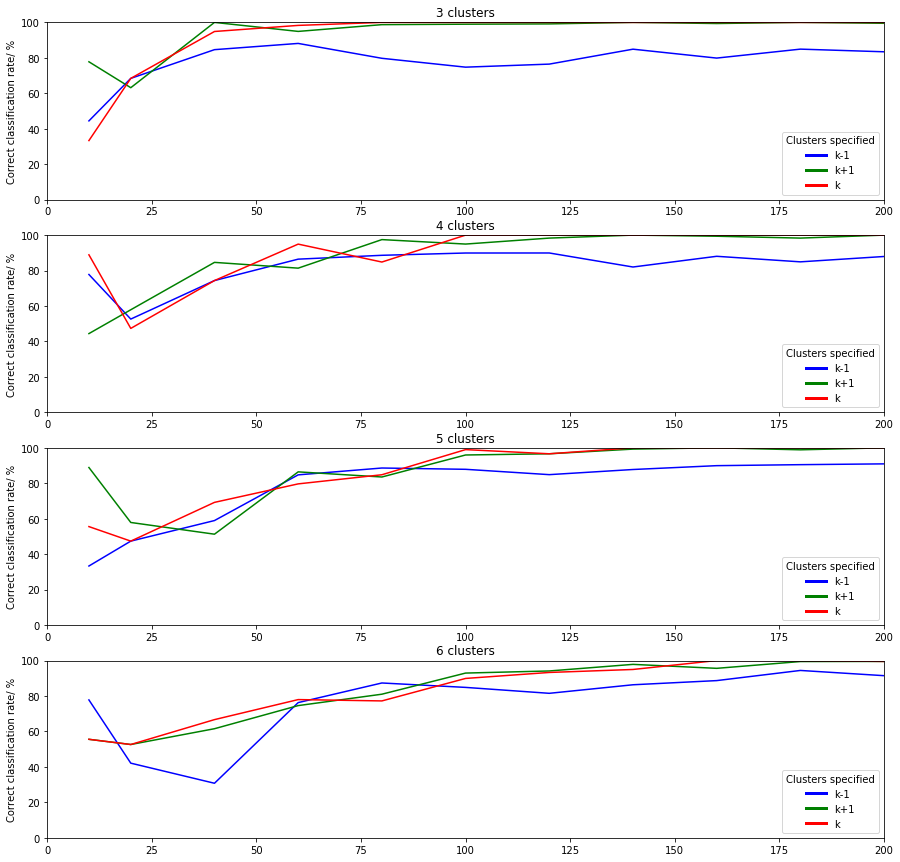

In [1]:
# Install packages

import numpy as np
import pandas as pd
from sklearn.cluster import spectral_clustering
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [27]:
q_range

[0.03, 0.03, 0.03, 0.03, 0.05, 0.05, 0.05, 0.08, 0.08]

In [25]:
# DEFINE PARAMETERS AND RANGES
k_range = [2,5,8,11]
n_range = [12,20,40,60,80,100,150,200,250,300,350,400,450,500]
pq_list = [[4, 1], [3,1],[2,1], [1.01, 1], [4,2], [3,2], [2.01, 2], [4,3], [3.01, 3]]

# CALCULATE Ps & Qs
n=200
p_range = []
q_range = []

for i in range(0, len(pq_list)):
    p = (pq_list[i][0] * np.log(n))/n
    p_range.append(round(p, 2))
    q = (pq_list[i][1] * np.log(n))/n
    q_range.append(round(q,2))
    
# p_range = np.subtract(([1] * len(p_range)), p_range)
# q_range = np.subtract(([1] * len(q_range)), q_range)

In [52]:
results = pd.DataFrame()

# LOOPS
for n in n_range:
    col_idx = "n_" + str(n) # Create column index for storing results   
    for k in k_range:
        for l in range(0,len(p_range)):
            
            p = p_range[l]
            q = q_range[l]
            
            # Initialise adjacency matrix and list of true classes
            ad = pd.DataFrame()
            classes= []

            # CREATE ADJACENCY MATRIX
            for i in range(0, n):
                ad.loc[i,i] = int(1) # Add diagonal entries
                classes.append(np.floor((i/n) * k)) # Record true class

                for j in range(i+1, n):
                    if np.floor(((i/n) * k)) == np.floor(((j/n) * k)): # Check if these entries below to the same community
                        ad.loc[i, j] = np.random.binomial(1, p) 

                    else: 
                        ad.loc[i, j] = np.random.binomial(1, q)
                    ad.loc[j,i] = ad.loc[i,j] # Reflect matrix on diagonal to create symmetric matrix

            # PERFORM CLUSTERING
            pred_cluster =spectral_clustering(np.array(ad), n_clusters= k)

            # COUNT INCORRECTLY CLASSIFIED- Assess clustering performance
            correctly_classed = 0
            incorrectly_classed = 0
            true_cluster = np.array(classes)

            for i in range(0, len(np.array(classes))-1):
                    j = i+1
                    if true_cluster[i] == true_cluster[j] and pred_cluster[i] == pred_cluster[j]:
                        correctly_classed += 1
                    elif true_cluster[i] != true_cluster[j] and pred_cluster[i] != pred_cluster[j]:
                        correctly_classed += 1
                    else : incorrectly_classed += 1

            # RECORD RESULTS
            row_idx = "k" + str(k) + "_p" + str(round(p,2)) + "_q" + str(round(q,2)) # Create row index for storing results
            proportion_correctly_classed = round((correctly_classed/ (correctly_classed + incorrectly_classed) * 100), 2)
            results.loc[row_idx, col_idx] = proportion_correctly_classed

In [53]:
# results

In [ ]:
# Plot results
res = results
row_idxs = results.index

colors = ['blue', 'green', 'red', 'black', 'yellow']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]

plt.show()

f, axs = plt.subplots(3,3, figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.plot(n_range, res.loc[row_idxs[0],:], 'b-',
         n_range, res.loc[row_idxs[1],:], 'g-',
         n_range, res.loc[row_idxs[2],:], 'r-',
         n_range, res.loc[row_idxs[3],:], 'k-')
plt.title('3 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0, 100)
plt.xlim(0, 500)
labels = [str(row_idxs[0]), str(row_idxs[1]), str(row_idxs[2]), str(row_idxs[3])] # pq
plt.legend(lines, labels, loc = "lower left", title = "pq values")

plt.subplot(3, 3, 2)
plt.plot(n_range, res.loc[row_idxs[4],:], 'b-',
         n_range, res.loc[row_idxs[5],:], 'g-',
         n_range, res.loc[row_idxs[6],:], 'r-')
plt.title('3 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0, 100)
plt.xlim(0,500)
labels = [str(row_idxs[4]), str(row_idxs[5]), str(row_idxs[6])] # pq
plt.legend(lines, labels, loc = "lower right", title = "pq values")

plt.subplot(3, 3, 3)
plt.plot(n_range, res.loc[row_idxs[7],:], 'b-',
         n_range, res.loc[row_idxs[8],:], 'g-')
plt.title('3 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,500)
labels = [str(row_idxs[7]), str(row_idxs[8])] # pq
plt.legend(lines, labels, loc = "lower right", title = "pq values")

plt.subplot(3, 3, 4)
plt.plot(n_range, res.loc[row_idxs[9],:], 'b-',
         n_range, res.loc[row_idxs[10],:], 'g-',
         n_range, res.loc[row_idxs[11],:], 'r-',
         n_range, res.loc[row_idxs[12],:], 'k-')
plt.title('4 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,500)
labels = [str(row_idxs[9]), str(row_idxs[10]), str(row_idxs[11]), str(row_idxs[12])] # pq
plt.legend(lines, labels, loc = "lower left", title = "pq values")

plt.subplot(3, 3, 5)
plt.plot(n_range, res.loc[row_idxs[13],:], 'b-',
         n_range, res.loc[row_idxs[14],:], 'g-',
         n_range, res.loc[row_idxs[15],:], 'r-' )
plt.title('4 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,500)
labels = [str(row_idxs[13]), str(row_idxs[14]), str(row_idxs[15])] # pq
plt.legend(lines, labels, loc = "upper right", title = "pq values")


plt.subplot(3, 3, 6)
plt.plot(n_range, res.loc[row_idxs[16],:],'b-',
         n_range,  res.loc[row_idxs[17],:], 'g-')
plt.title('4 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,500)
labels = [str(row_idxs[16]), str(row_idxs[17])] # pq
plt.legend(lines, labels, loc = "upper right", title = "pq values")

plt.subplot(3, 3, 7)
plt.plot(n_range, res.loc[row_idxs[18],:], 'b-',
         n_range,  res.loc[row_idxs[19],:], 'g-',
         n_range,  res.loc[row_idxs[20],:], 'r-',
         n_range,  res.loc[row_idxs[21],:], 'k-')
plt.title('5 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,500)
labels = [str(row_idxs[18]), str(row_idxs[19]), str(row_idxs[20]), str(row_idxs[21])] # pq
plt.legend(lines, labels, loc = "upper left", title = "pq values")

plt.subplot(3, 3, 8)
plt.plot(n_range, res.loc[row_idxs[22],:], 'b-',
         n_range,  res.loc[row_idxs[23],:], 'g-',
         n_range,  res.loc[row_idxs[24],:], 'r-')
plt.title('5 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,500)
labels = [str(row_idxs[22]), str(row_idxs[23]), str(row_idxs[24])] # pq
plt.legend(lines, labels, loc = "upper right", title = "pq values")

plt.subplot(3, 3, 9)
plt.plot(n_range, res.loc[row_idxs[25],:], 'b-',
         n_range,  res.loc[row_idxs[26],:], 'g-')
plt.title('5 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,500)
labels = [str(row_idxs[25]), str(row_idxs[26])] # pq
plt.legend(lines, labels, loc = "upper right", title = "pq values")

plt.show()

In [ ]:
plt.show()

f, axs = plt.subplots(1,3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_range, res.loc[row_idxs[27],:], 'b-',
         n_range, res.loc[row_idxs[28],:], 'g-',
         n_range, res.loc[row_idxs[29],:], 'r-',
         n_range, res.loc[row_idxs[30],:], 'k-')

plt.title('6 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0, 100)
plt.xlim(0, 500)
labels = [str(row_idxs[27]), str(row_idxs[28]), str(row_idxs[29]), str(row_idxs[30])] # pq
plt.legend(lines, labels, loc = "upper right", title = "Number of nodes")

plt.subplot(1, 3, 2)
plt.plot(n_range, res.loc[row_idxs[31],:], 'b-',
         n_range, res.loc[row_idxs[32],:], 'g-',
         n_range, res.loc[row_idxs[33],:], 'r-')
plt.title('6 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0, 500)
labels = [str(row_idxs[31]), str(row_idxs[32]), str(row_idxs[33])] # pq
plt.legend(lines, labels, loc = "upper right", title = "pq values")

plt.subplot(1, 3, 3)
plt.plot(n_range, res.loc[row_idxs[34],:], 'b-',
         n_range, res.loc[row_idxs[35],:], 'g-')
plt.title('6 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0, 500)
labels = [str(row_idxs[34]), str(row_idxs[35])] # pq
plt.legend(lines, labels, loc = "upper right", title = "pq values")

In [40]:
# DEFINE PARAMETERS AND RANGES
k_range = [3,4,5,6]
n_range = [10,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500]

results = pd.DataFrame()

# LOOPS
for n in n_range:
    col_idx = "n_" + str(n) # Create column index for storing results 
    
    for k in k_range:
            
            # Initialise adjacency matrix and list of true classes
            ad = pd.DataFrame()
            classes= []

            # CREATE ADJACENCY MATRIX
            for i in range(0, n):
                ad.loc[i,i] = int(1) # Add diagonal entries
                classes.append(np.floor((i/n) * k)) # Record true class

                for j in range(i+1, n):
                    if np.floor(((i/n) * k)) == np.floor(((j/n) * k)): # Check if these entries below to the same community
                        ad.loc[i, j] = np.random.binomial(1, 0.25) 

                    else: 
                        ad.loc[i, j] = np.random.binomial(1, 0.01)
                    ad.loc[j,i] = ad.loc[i,j] # Reflect matrix on diagonal to create symmetric matrix

            # PERFORM CLUSTERING
            pred_cluster =spectral_clustering(np.array(ad), n_clusters= k+1)

            # COUNT INCORRECTLY CLASSIFIED- Assess clustering performance
            correctly_classed = 0
            incorrectly_classed = 0
            true_cluster = np.array(classes)

            for i in range(0, len(np.array(classes))-1):
                    j = i+1
                    if true_cluster[i] == true_cluster[j] and pred_cluster[i] == pred_cluster[j]:
                        correctly_classed += 1
                    elif true_cluster[i] != true_cluster[j] and pred_cluster[i] != pred_cluster[j]:
                        correctly_classed += 1
                    else : incorrectly_classed += 1

            # RECORD RESULTS
            row_idx = "k+1" + str(k) + "_p" + str(round(p,3)) + "_q" + str(round(q,3)) # Create row index for storing results
            proportion_correctly_classed = round((correctly_classed/ (correctly_classed + incorrectly_classed) * 100), 2)
            results.loc[row_idx, col_idx] = proportion_correctly_classed
            
            # Initialise adjacency matrix and list of true classes
            ad = pd.DataFrame()
            classes= []

            # CREATE ADJACENCY MATRIX
            for i in range(0, n):
                ad.loc[i,i] = int(1) # Add diagonal entries
                classes.append(np.floor((i/n) * k)) # Record true class

                for j in range(i+1, n):
                    if np.floor(((i/n) * k)) == np.floor(((j/n) * k)): # Check if these entries below to the same community
                        ad.loc[i, j] = np.random.binomial(1, 0.25) 

                    else: 
                        ad.loc[i, j] = np.random.binomial(1, 0.01)
                    ad.loc[j,i] = ad.loc[i,j] # Reflect matrix on diagonal to create symmetric matrix
            
            # PERFORM CLUSTERING
            pred_cluster =spectral_clustering(np.array(ad), n_clusters= k-1)

            # COUNT INCORRECTLY CLASSIFIED- Assess clustering performance
            correctly_classed = 0
            incorrectly_classed = 0
            true_cluster = np.array(classes)

            for i in range(0, len(np.array(classes))-1):
                    j = i+1
                    if true_cluster[i] == true_cluster[j] and pred_cluster[i] == pred_cluster[j]:
                        correctly_classed += 1
                    elif true_cluster[i] != true_cluster[j] and pred_cluster[i] != pred_cluster[j]:
                        correctly_classed += 1
                    else : incorrectly_classed += 1

            # RECORD RESULTS
            row_idx = "k-1_k" + str(k) + "_p" + str(round(p,3)) + "_q" + str(round(q,3)) # Create row index for storing results
            proportion_correctly_classed = round((correctly_classed/ (correctly_classed + incorrectly_classed) * 100), 2)
            results.loc[row_idx, col_idx] = proportion_correctly_classed
            
            # Initialise adjacency matrix and list of true classes
            ad = pd.DataFrame()
            classes= []

            # CREATE ADJACENCY MATRIX
            for i in range(0, n):
                ad.loc[i,i] = int(1) # Add diagonal entries
                classes.append(np.floor((i/n) * k)) # Record true class

                for j in range(i+1, n):
                    if np.floor(((i/n) * k)) == np.floor(((j/n) * k)): # Check if these entries below to the same community
                        ad.loc[i, j] = np.random.binomial(1, 0.25) 

                    else: 
                        ad.loc[i, j] = np.random.binomial(1, 0.01)
                    ad.loc[j,i] = ad.loc[i,j] # Reflect matrix on diagonal to create symmetric matrix
            
            
            # PERFORM CLUSTERING
            pred_cluster =spectral_clustering(np.array(ad), n_clusters= k)

            # COUNT INCORRECTLY CLASSIFIED- Assess clustering performance
            correctly_classed = 0
            incorrectly_classed = 0
            true_cluster = np.array(classes)

            for i in range(0, len(np.array(classes))-1):
                    j = i+1
                    if true_cluster[i] == true_cluster[j] and pred_cluster[i] == pred_cluster[j]:
                        correctly_classed += 1
                    elif true_cluster[i] != true_cluster[j] and pred_cluster[i] != pred_cluster[j]:
                        correctly_classed += 1
                    else : incorrectly_classed += 1

            # RECORD RESULTS
            row_idx = "k" + str(k) + "_p" + str(round(p,3)) + "_q" + str(round(q,3)) # Create row index for storing results
            proportion_correctly_classed = round((correctly_classed/ (correctly_classed + incorrectly_classed) * 100), 2)
            results.loc[row_idx, col_idx] = proportion_correctly_classed

In [34]:
# change_k_res=results

In [63]:
change_k_res

,n_10,n_20,n_40,n_60,n_80,n_100,n_120,n_140,n_160,n_180,...,n_320,n_340,n_360,n_380,n_400,n_420,n_440,n_460,n_480,n_500
k+13_p0.08_q0.08,44.44,68.42,84.62,88.14,79.75,74.75,76.47,84.89,79.87,84.92,...,86.52,84.07,83.01,85.22,84.21,82.82,83.14,85.84,82.88,83.97
k-1_k3_p0.08_q0.08,77.78,63.16,100.00,94.92,98.73,98.99,99.16,100.00,99.37,100.00,...,100.00,99.71,100.00,99.74,99.75,100.00,99.77,99.78,99.79,99.80
k3_p0.08_q0.08,33.33,68.42,94.87,98.31,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
k+14_p0.08_q0.08,77.78,52.63,74.36,86.44,88.61,89.90,89.92,82.01,88.05,84.92,...,91.85,87.61,87.47,88.39,88.47,87.11,86.56,86.71,87.47,90.58
k-1_k4_p0.08_q0.08,44.44,57.89,84.62,81.36,97.47,94.95,98.32,100.00,99.37,98.32,...,99.69,99.71,99.72,100.00,99.75,100.00,100.00,100.00,99.79,99.80
k4_p0.08_q0.08,88.89,47.37,74.36,94.92,84.81,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
k+15_p0.08_q0.08,33.33,47.37,58.97,84.75,88.61,87.88,84.87,87.77,89.94,90.50,...,92.48,89.68,89.69,91.82,88.22,90.45,89.29,91.29,90.19,90.78
k-1_k5_p0.08_q0.08,88.89,57.89,51.28,86.44,83.54,95.96,96.64,99.28,100.00,98.88,...,100.00,100.00,99.72,99.74,100.00,99.76,100.00,99.78,100.00,99.80
k5_p0.08_q0.08,55.56,47.37,69.23,79.66,84.81,98.99,96.64,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
k+16_p0.08_q0.08,77.78,42.11,30.77,76.27,87.34,84.85,81.51,86.33,88.68,94.41,...,89.97,92.63,91.36,91.03,91.48,91.41,92.94,90.85,91.86,90.78


In [ ]:
# Plot results
res = change_k_res
row_idxs = change_k_res.index

colors = ['blue', 'green', 'red', 'black', 'yellow']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]

plt.show()

f, axs = plt.subplots(4,1, figsize=(15, 15))

plt.subplot(4, 1, 1)
plt.plot(n_range, res.loc[row_idxs[0],:], 'b-',
         n_range, res.loc[row_idxs[1],:], 'g-',
         n_range, res.loc[row_idxs[2],:], 'r-')
plt.title('3 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0, 100)
plt.xlim(0, 200)
labels = ['k-1', 'k+1', 'k'] # pq
plt.legend(lines, labels, loc = "lower right", title = "Clusters specified")

plt.subplot(4, 1, 2)
plt.plot(n_range, res.loc[row_idxs[3],:], 'b-',
         n_range, res.loc[row_idxs[4],:], 'g-',
         n_range, res.loc[row_idxs[5],:], 'r-')
plt.title('4 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0, 100)
plt.xlim(0,200)
labels = ['k-1', 'k+1', 'k'] # pq
plt.legend(lines, labels, loc = "lower right", title = "Clusters specified")

plt.subplot(4, 1, 3)
plt.plot(n_range, res.loc[row_idxs[6],:], 'b-',
         n_range, res.loc[row_idxs[7],:], 'g-',
         n_range, res.loc[row_idxs[8],:], 'r-')
plt.title('5 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0 , 100)
plt.xlim(0,200)
labels = ['k-1', 'k+1', 'k'] # pq
plt.legend(lines, labels, loc = "lower right", title = "Clusters specified")

plt.subplot(4, 1, 4)
plt.plot(n_range, res.loc[row_idxs[9],:], 'b-',
         n_range, res.loc[row_idxs[10],:], 'g-',
         n_range, res.loc[row_idxs[11],:], 'r-')
plt.title('6 clusters')
plt.ylabel('Correct classification rate/ %')
plt.ylim(0, 100)
plt.xlim(0, 200)

labels = ['k-1', 'k+1', 'k'] # pq
plt.legend(lines, labels, loc = "lower right", title = "Clusters specified")

plt.show()